In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  


Text(0.5, 1.0, 'SVM Decision Region Boundary')

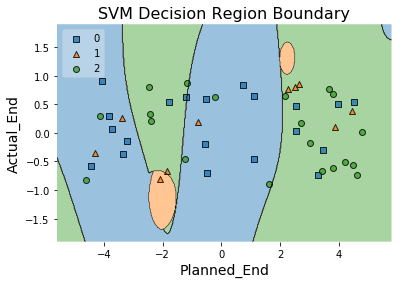

In [54]:
### code base from an example from
# https://stackoverflow.com/questions/43284811/plot-svm-with-matplotlib
# Create arbitrary dataset for example
df = pd.DataFrame({'Planned_End': np.random.uniform(low=-5, high=5, size=50),
                   'Actual_End':  np.random.uniform(low=-1, high=1, size=50),
                   'Late':        np.random.random_integers(low=0,  high=2, size=50)}
)

# Fit Support Vector Machine Classifier
X = df[['Planned_End', 'Actual_End']]
y = df['Late']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

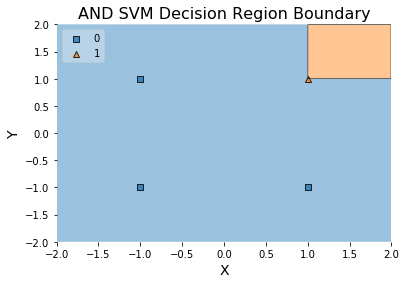

In [55]:
### And with simple data
and_df = pd.DataFrame({'X': [1, 1, -1, -1],
                       'Y': [1, -1, -1, 1]  ,
                   'Label': [1, 0, 0, 0]})

X = and_df[['X', 'Y']]
y = and_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('AND SVM Decision Region Boundary', size=16)
plt.show()

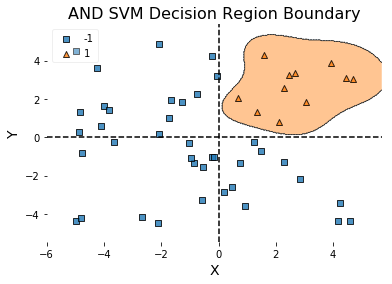

In [56]:
### And with random data
and_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
and_df['Label'] = and_label(and_df)

def and_label(df):
    rtn = []
    for i in range(50):
        if df['X'][i] >= 0 and df['Y'][i] >= 0:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

X = and_df[['X', 'Y']]
y = and_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('AND SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

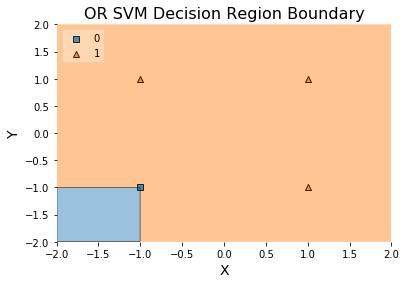

array([1, 1, 0, 1], dtype=int64)

In [57]:
### Or with simple data
or_df = pd.DataFrame({'X': [1, 1, -1, -1],
                      'Y': [1, -1, -1, 1]  ,
                  'Label': [1, 1, 0, 1]})

X = or_df[['X', 'Y']]
y = or_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('OR SVM Decision Region Boundary', size=16)
plt.show()
y.values

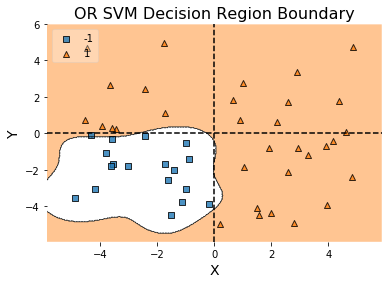

In [58]:
### Or with random data
def or_label(df):
    rtn = []
    for i in range(50):
        if df['X'][i] >= 0 or df['Y'][i] >= 0:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

or_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
or_df['Label'] = or_label(or_df)

X = or_df[['X', 'Y']]
y = or_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('OR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

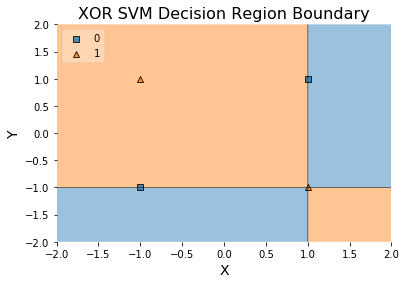

In [59]:
xor_df = pd.DataFrame({'X': [1, 1, -1, -1],
                       'Y': [1, -1, -1, 1]  ,
                   'Label': [0, 1, 0, 1]})

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XOR SVM Decision Region Boundary', size=16)
plt.show()

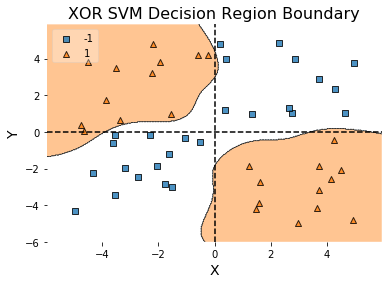

In [60]:
def xor_label(df):
    rtn = []
    for i in range(50):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn
xor_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
xor_df['Label'] = xor_label(xor_df)

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XOR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()